# Objective

Visualize the current results of the luminoth Faster RCNN model as of Nov. 11, 2020.

# Dataset

- Training set: 35 images - all 25 images from what I call 'set_2' plus 10 images from 'set_1' where the locations are very close to the spots

- Test set: 14 other images from set_1.

No overlap between training set and test set.

In [18]:
from skimage.io import imread
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from os import listdir
import numpy as np

In [3]:
files = listdir('./test_images_nov9/')
names = []
for file in files:
    if file[-4:]=='.tif':
        names.append(file[:-4])

In [4]:
names

['image-cropped-rescaled-20200916-192532-4',
 'image-cropped-rescaled-20200916-192532-1',
 'image-cropped-rescaled-20200901-193536-2',
 'image-cropped-rescaled-20200901-193823-2',
 'image-cropped-rescaled-20200916-192532-7',
 'image-cropped-rescaled-20200901-194356-3',
 'image-cropped-rescaled-20200916-192532-2',
 'image-cropped-rescaled-20200901-194356-6',
 'image-cropped-rescaled-20200901-194356-5',
 'image-cropped-rescaled-20200901-194109-7',
 'image-cropped-rescaled-20200916-192246-5',
 'image-cropped-rescaled-20200901-193823-5',
 'image-cropped-rescaled-20200901-193823-6',
 'image-cropped-rescaled-20200901-194109-6']


--------------------------------------------

image-cropped-rescaled-20200916-192532-4


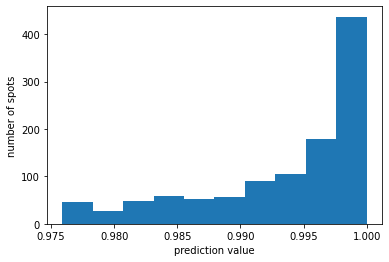

count ground_truth:       579
count prediction > 0.98:  1038


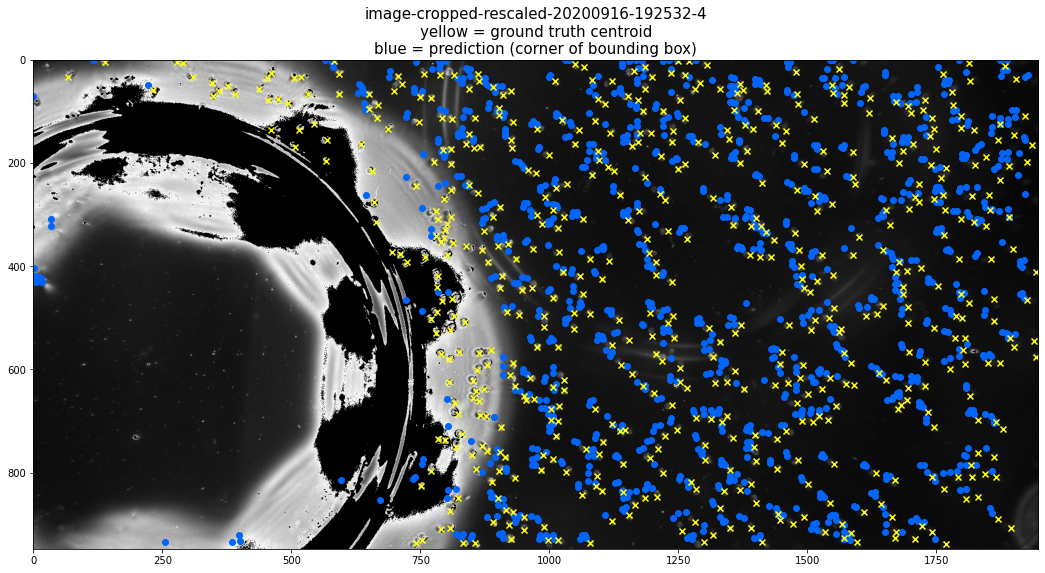


--------------------------------------------

image-cropped-rescaled-20200916-192532-1


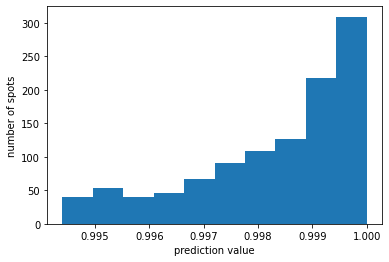

count ground_truth:       882
count prediction > 0.98:  1100


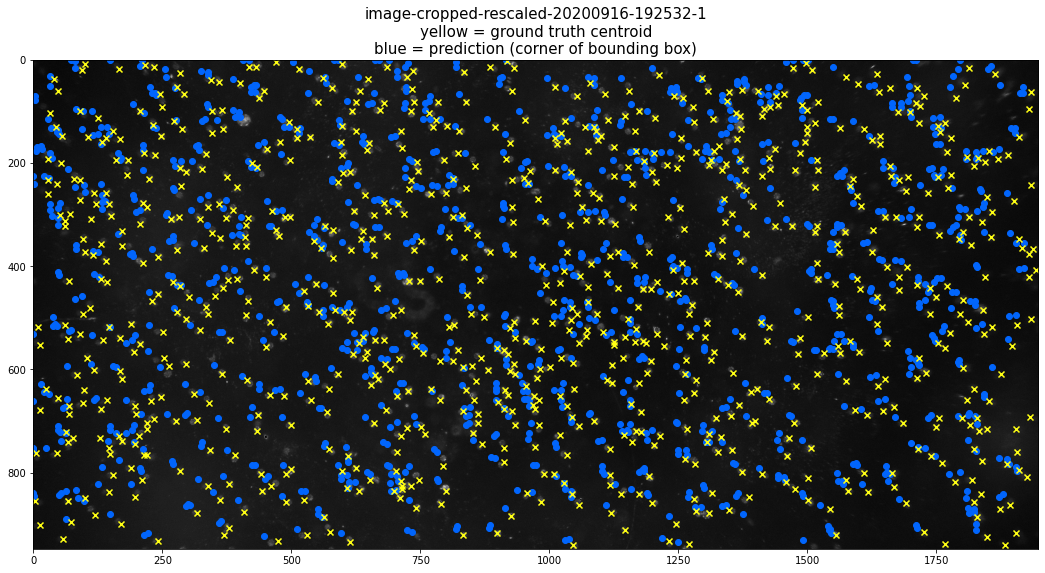


--------------------------------------------

image-cropped-rescaled-20200901-193536-2


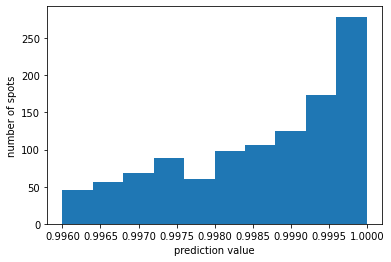

count ground_truth:       1086
count prediction > 0.98:  1100


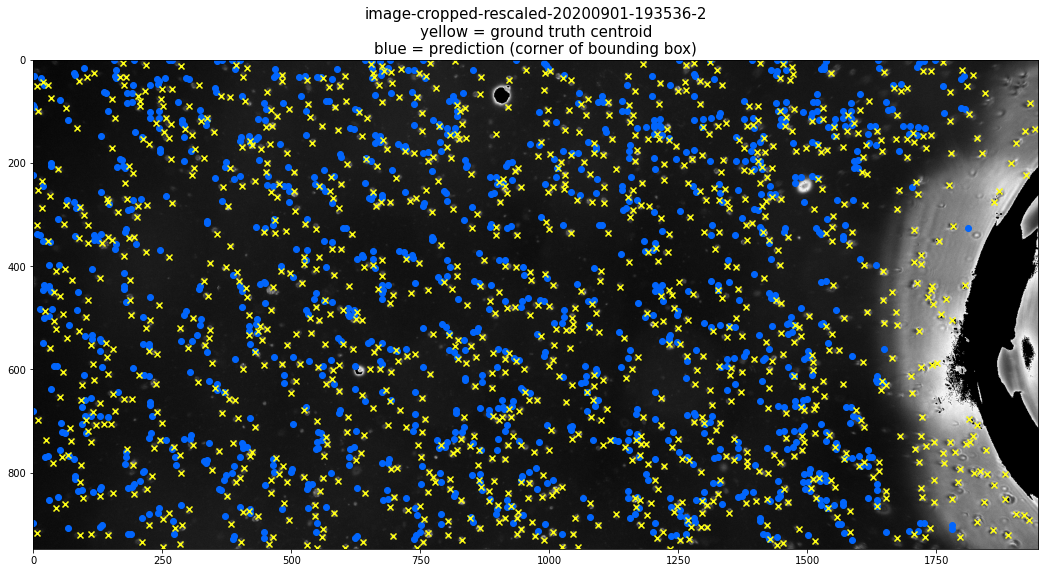


--------------------------------------------

image-cropped-rescaled-20200901-193823-2


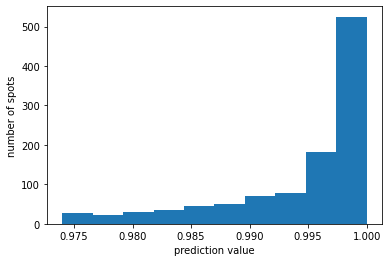

count ground_truth:       460
count prediction > 0.98:  1005


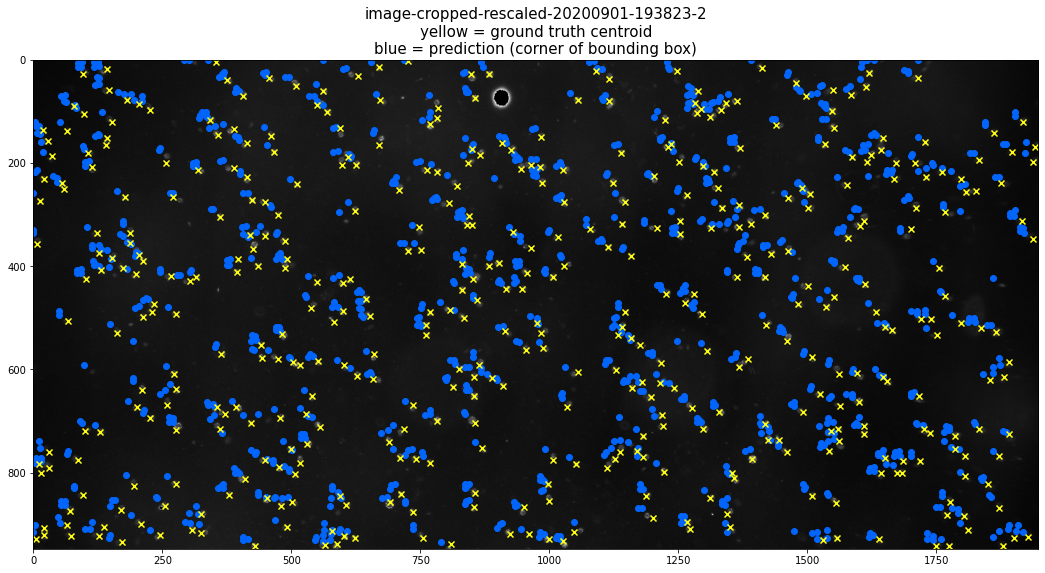


--------------------------------------------

image-cropped-rescaled-20200916-192532-7


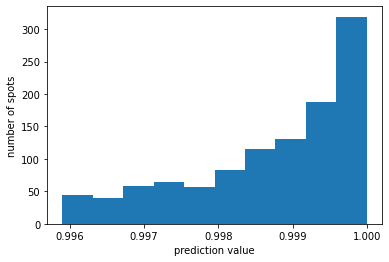

count ground_truth:       927
count prediction > 0.98:  1100


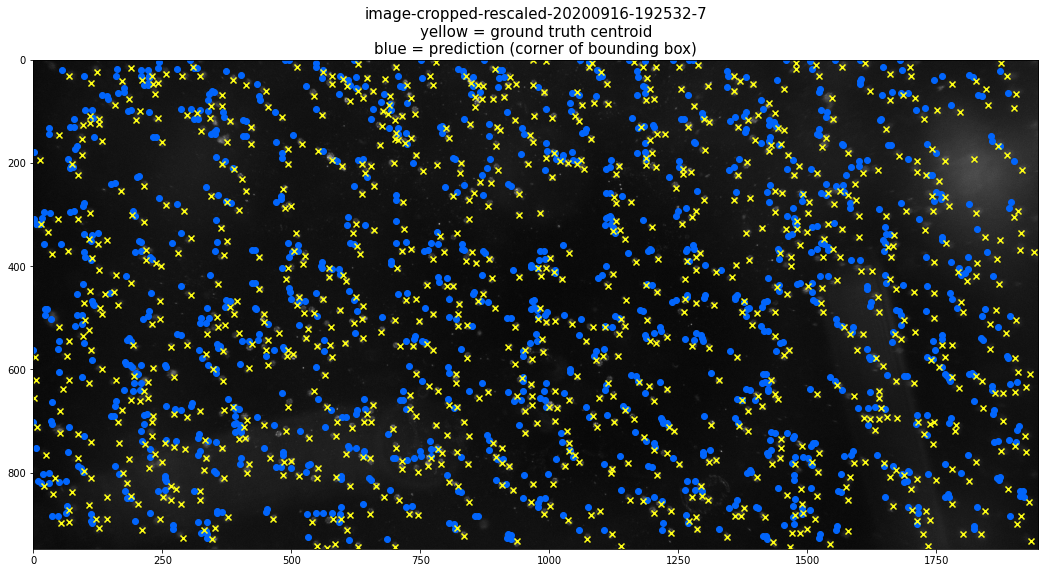


--------------------------------------------

image-cropped-rescaled-20200901-194356-3


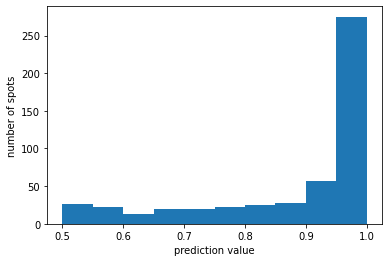

count ground_truth:       98
count prediction > 0.98:  220


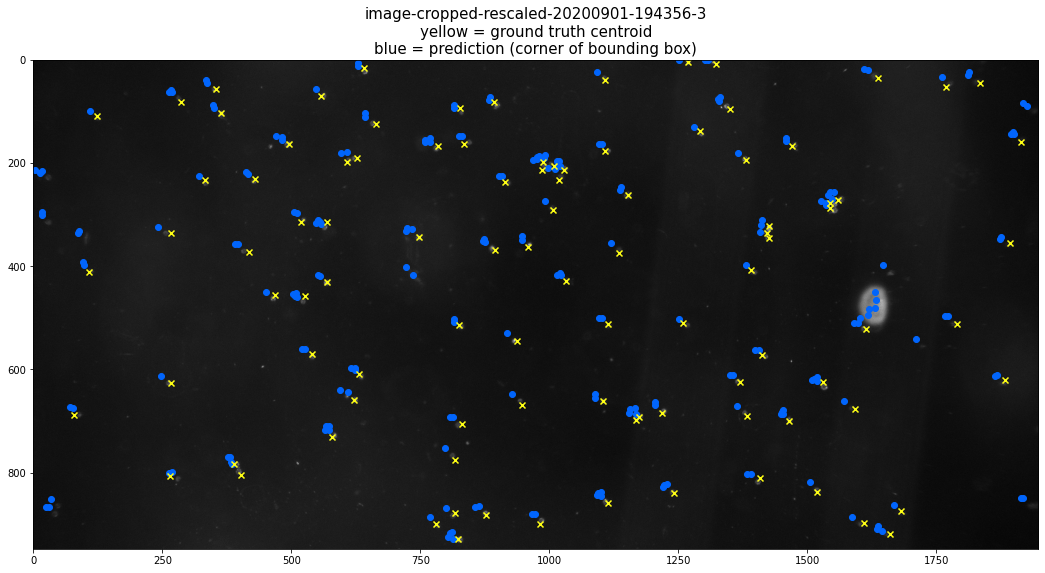


--------------------------------------------

image-cropped-rescaled-20200916-192532-2


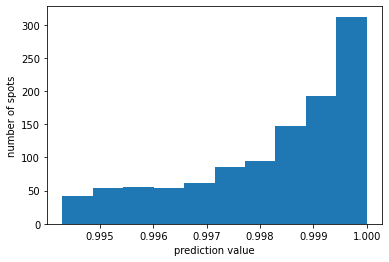

count ground_truth:       753
count prediction > 0.98:  1100


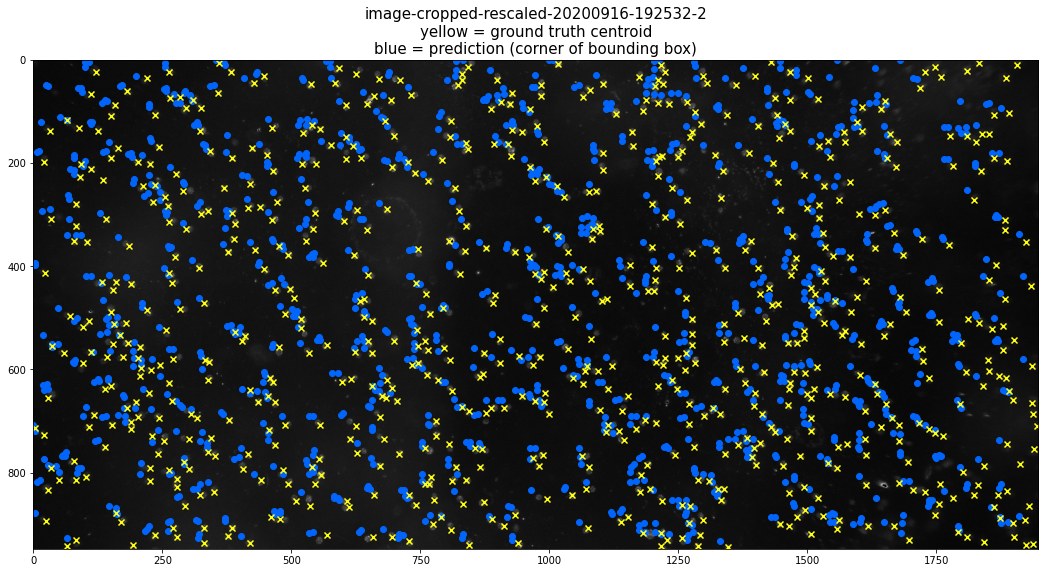


--------------------------------------------

image-cropped-rescaled-20200901-194356-6


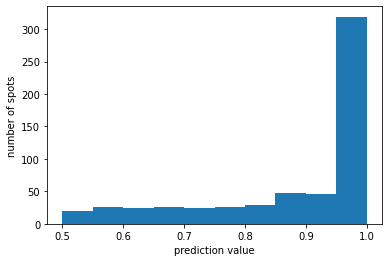

count ground_truth:       113
count prediction > 0.98:  264


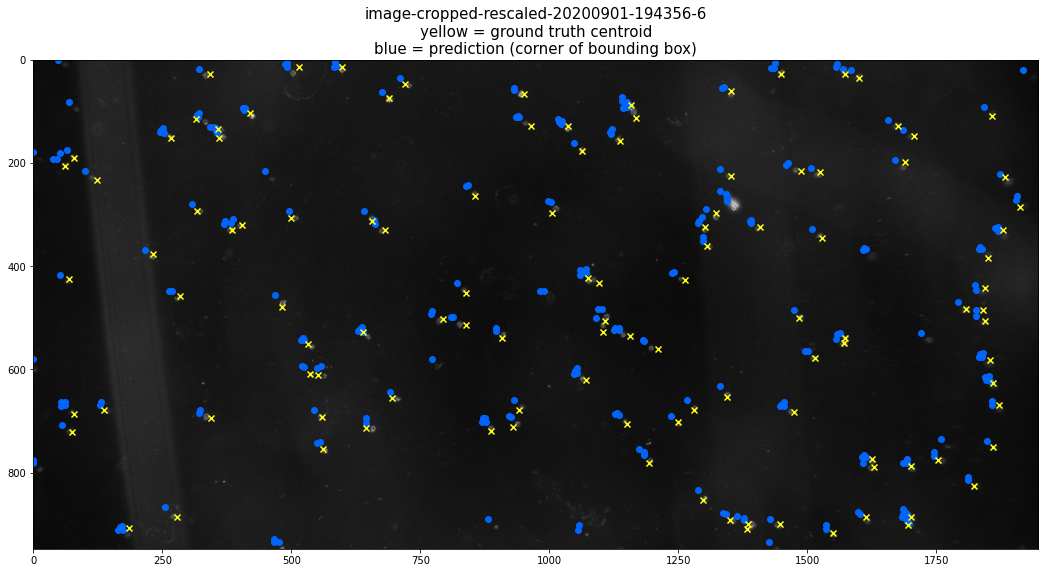


--------------------------------------------

image-cropped-rescaled-20200901-194356-5


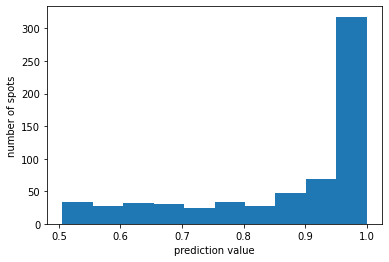

count ground_truth:       115
count prediction > 0.98:  268


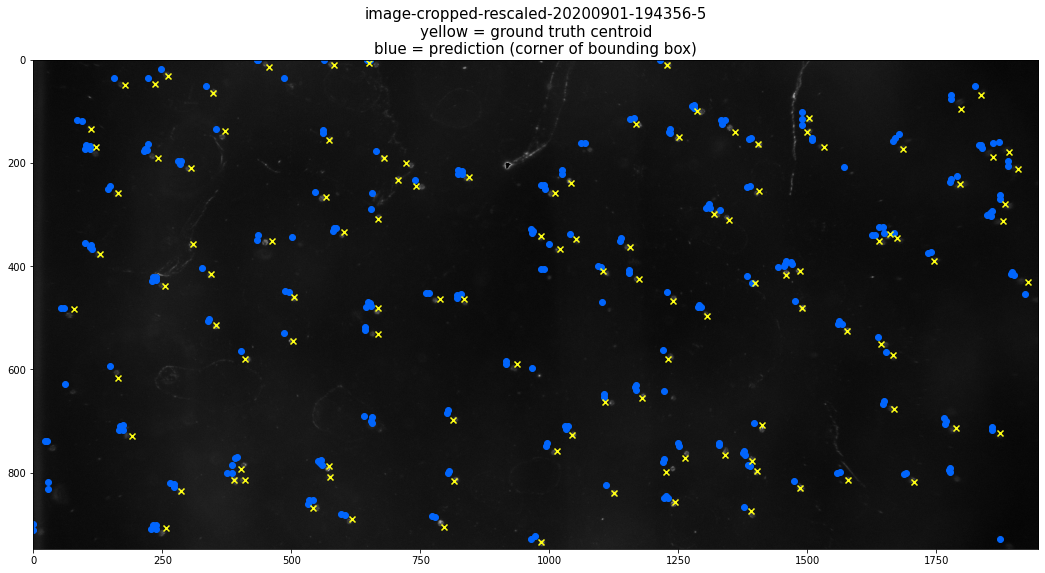


--------------------------------------------

image-cropped-rescaled-20200901-194109-7


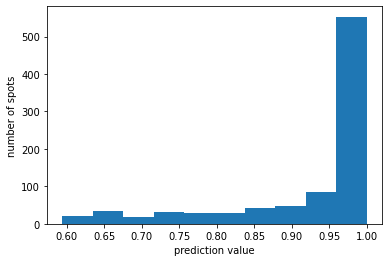

count ground_truth:       239
count prediction > 0.98:  490


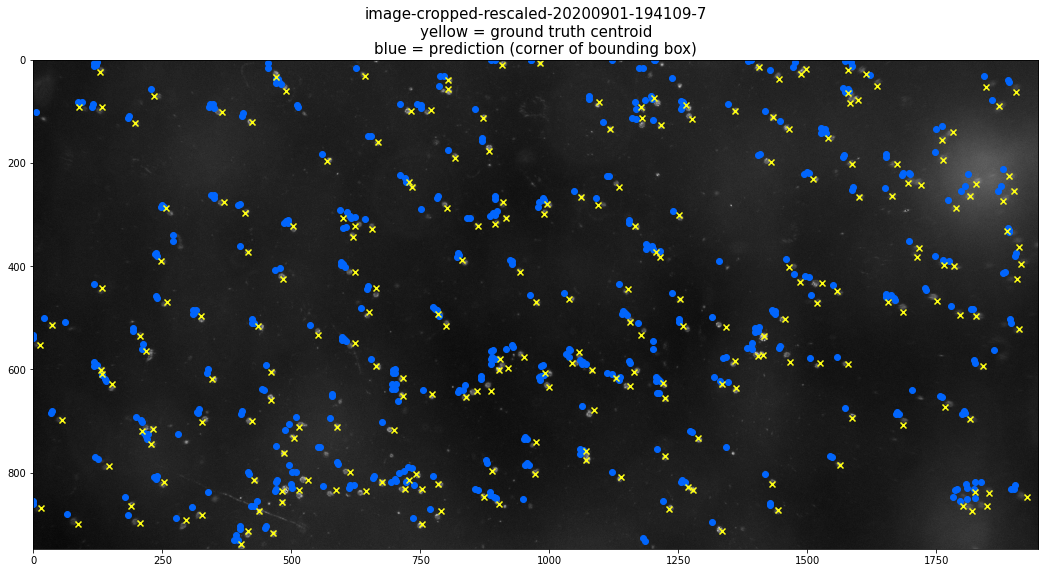


--------------------------------------------

image-cropped-rescaled-20200916-192246-5


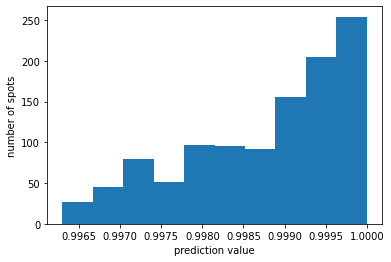

count ground_truth:       904
count prediction > 0.98:  1100


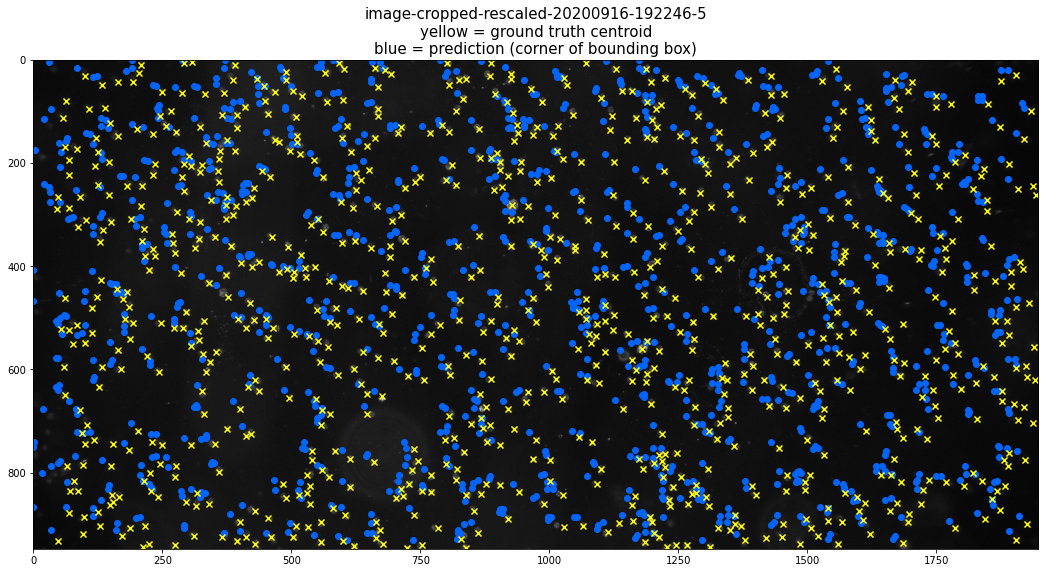


--------------------------------------------

image-cropped-rescaled-20200901-193823-5


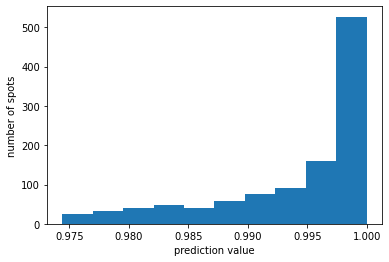

count ground_truth:       485
count prediction > 0.98:  1032


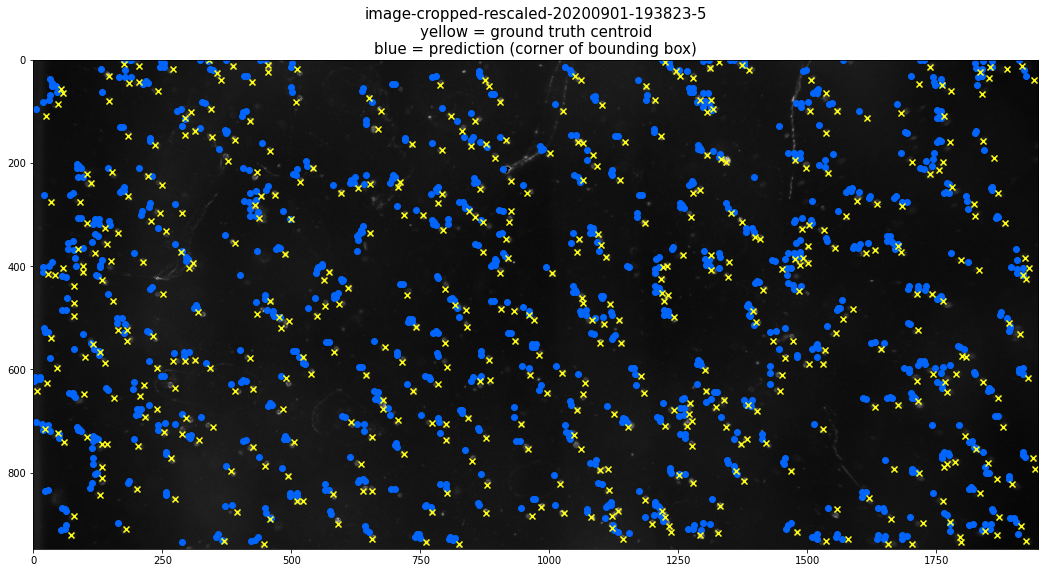


--------------------------------------------

image-cropped-rescaled-20200901-193823-6


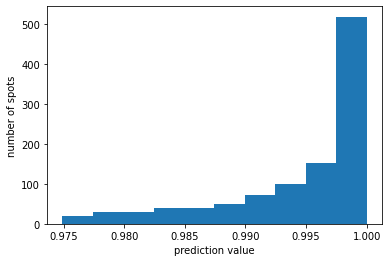

count ground_truth:       457
count prediction > 0.98:  998


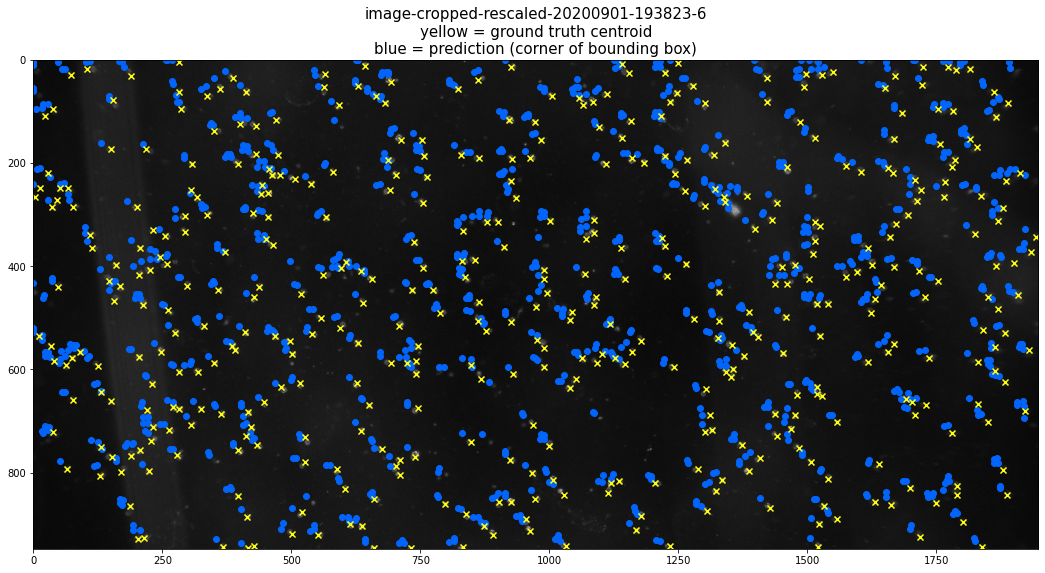


--------------------------------------------

image-cropped-rescaled-20200901-194109-6


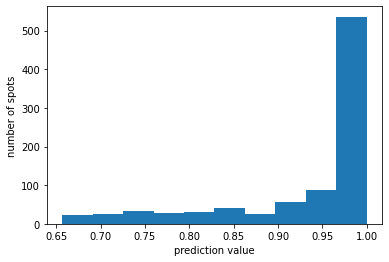

count ground_truth:       217
count prediction > 0.98:  460


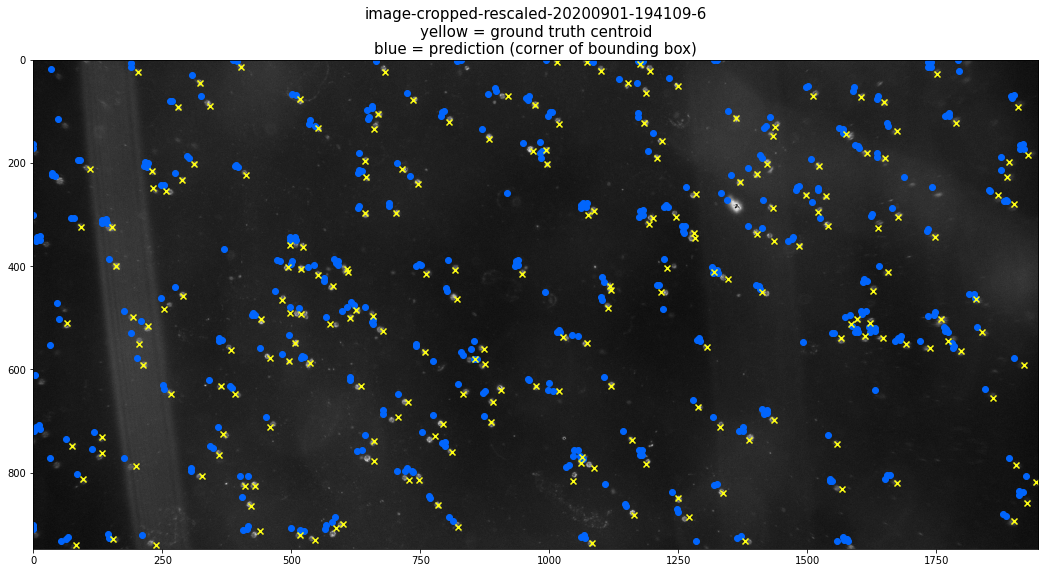

In [5]:
for name in names:
    print('\n--------------------------------------------\n')
    print(name)
    
    df_pred = pd.read_csv('./predictions_nov10/%s_predictions.csv' % name)
    im = imread('./test_images_nov9/%s.tif' % name)
    df_gt = pd.read_csv('./test_ground_truth_nov9/%s.csv' % name)

    plt.hist(df_pred.prob)
    plt.xlabel('prediction value')
    plt.ylabel('number of spots')
    plt.show()

    df_pred_filtered = df_pred[df_pred.prob > 0.98]

    print('count ground_truth:      ', len(df_gt))
    print('count prediction > 0.98: ', len(df_pred_filtered))

    plt.figure(figsize=(19, 9))
    plt.imshow(im, cmap='gray')
    plt.scatter(df_pred_filtered.xmin, df_pred_filtered.ymin, color='xkcd:bright blue')
    plt.scatter(df_gt.X, df_gt.Y, marker='x', color='xkcd:yellow')
    title = name + '\nyellow = ground truth centroid\nblue = prediction (corner of bounding box)'
    plt.title(title, fontsize=15)
    plt.show()

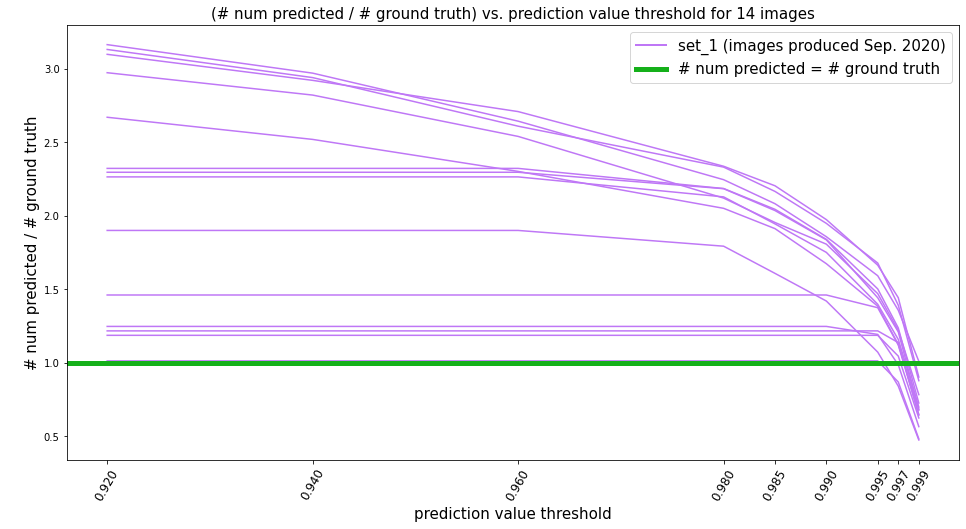

In [6]:
thresholds = [0.92, 0.94, 0.96, 0.98, 00.985, 0.99, 0.995, 0.997, 0.999]
value_dict = {}
for thresh in thresholds:
    value_dict[thresh] = 0
plt.figure(figsize=(16, 8))
for name in names:
    
    df_pred = pd.read_csv('./predictions_nov10/%s_predictions.csv' % name)
    df_gt = pd.read_csv('./test_ground_truth_nov9/%s.csv' % name)
    num_gt = len(df_gt)
    
    values = []
    for thresh in thresholds:
        df_pred_filtered = df_pred[df_pred.prob > thresh]
        value = len(df_pred_filtered) / num_gt
        value_dict[thresh] += value
        values.append(value)
    if '202010' in name:
        color = 'xkcd:light blue'
    elif '202009' in name:
        color = 'xkcd:light purple'
    plt.plot(thresholds, values, color=color)

for key in value_dict:
    value_dict[key] = value_dict[key]/len(names)
avg_values = value_dict.values()
# plt.plot(thresholds, avg_values, color='xkcd:blue', lw=5)

plt.axhline(y=1, color='xkcd:green', linestyle='-', lw=5)
plt.xticks(thresholds, rotation=60, fontsize=12)
plt.xlabel('prediction value threshold', fontsize=15)
plt.ylabel('\n# num predicted / # ground truth', fontsize=15)
plt.title('(# num predicted / # ground truth) vs. prediction value threshold for %s images' % str(len(names)), fontsize=15)

handle_list = []
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:light purple', lw=2, label='set_1 (images produced Sep. 2020)'))
# handle_list.append(Line2D([0],[0], marker=None, color='xkcd:light blue', lw=2, label='set_2 (images produced Oct. 2020)'))
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:green', lw=5, label='# num predicted = # ground truth'))
plt.legend(handles=handle_list, loc='upper right', fontsize=15)

plt.show()

In [47]:
from scipy.stats import linregress

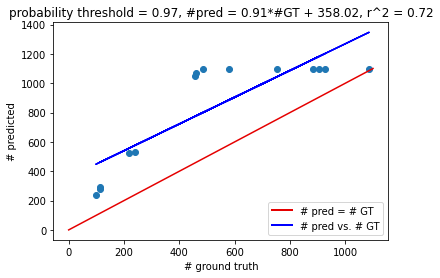

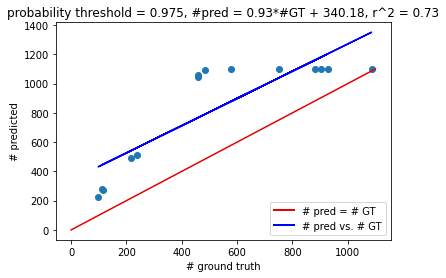

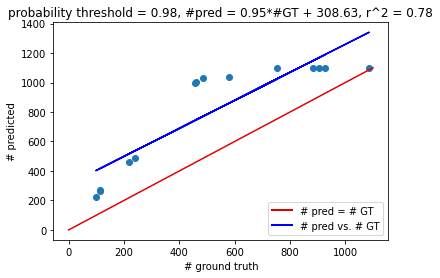

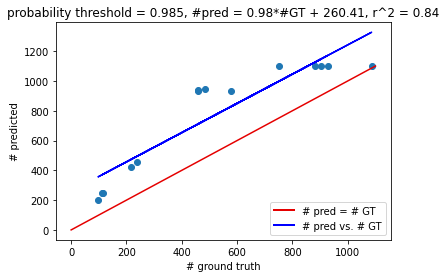

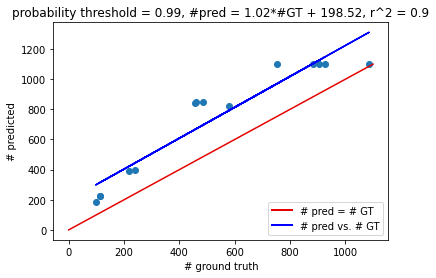

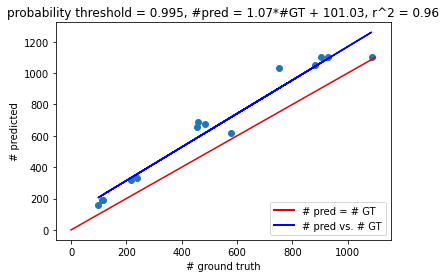

In [54]:
thresholds = [0.97, 0.975, 0.98, 0.985, 0.99, 0.995]
for thresh in thresholds:

    gt_counts, pred_counts = [], []
    for name in names:
        df_gt = pd.read_csv('./test_ground_truth_nov9/%s.csv' % name)
        df_pred = pd.read_csv('./predictions_nov10/%s_predictions.csv' % name)
        df_pred_filtered = df_pred[df_pred.prob > thresh]
        gt_counts.append(len(df_gt))
        pred_counts.append(len(df_pred_filtered))

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
    
    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
    
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)
    
    plt.scatter(gt_counts, pred_counts)
    plt.title('probability threshold = %s, #pred = %s*#GT + %s, r^2 = %s' % (str(round(thresh,4)), str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))
    plt.xlabel('# ground truth')
    plt.ylabel('# predicted')
    plt.plot([0, 1100], [0, 1100], color='xkcd:red')
    plt.show()

# Takeaway

This model uses more training data, including all images from the October set and all 10 images from the September set. Prediction was tested on 14 images from the September set. It ran for about 14000 steps.

Prediction results on this model are better using this model than in previous training/testing runs.

The best performance seems to have been achieved with probability thresholds in the range of 0.9965 - 0.9975. However, I think we would still want the # predictions vs. # ground truth line to be closer to the # predictions = # ground truth line.

# Next steps

1. Try additional data augmentation techniques. In particular: rotation, introducing gaussian noise, and distortion (brightness, hue, saturation, and contrast).

2. If results are still poor, generate more training data.